# Final Project

#### Course date:  10.01.2021
#### Name: Luz Stephanie
#### Surname: Fung Arenas
#### Email: merlinapomares@gmail.com

##### Project Name: 
###### Luce 45 Final project Luz 

##### Description: 
###### In this project, our aim is to building a model for predicting wine qualities. Our label will be quality column. Do not forget, this is a Classification problem!

#### Requirements:
* Final Project.ipynb
* Tarea 3.ipynb
* Tarea 2.ipynb
* Homework1

## Importing libraries

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read the winequality.csv file and describe it.

In [0]:
url = "https://raw.githubusercontent.com/globalaihub/introduction-to-machine-learning/main/Final%20Project/winequality.csv"
df = pd.read_csv(url)

print(df.head())

fixed acidity volatile acidity citric acid ... sulphates alcohol quality
0 7.4 0.70 0.00 ... 0.56 9.4 5
1 7.8 0.88 0.00 ... 0.68 9.8 5
2 7.8 0.76 0.04 ... 0.65 9.8 5
3 11.2 0.28 0.56 ... 0.58 9.8 6
4 7.4 0.70 0.00 ... 0.56 9.4 5

[5 rows x 12 columns]

In [0]:
print(df.describe().transpose())

count mean ... 75% max
fixed acidity 1599.0 8.319637 ... 9.200000 15.90000
volatile acidity 1599.0 0.527821 ... 0.640000 1.58000
citric acid 1599.0 0.270976 ... 0.420000 1.00000
residual sugar 1599.0 2.538806 ... 2.600000 15.50000
chlorides 1599.0 0.087467 ... 0.090000 0.61100
free sulfur dioxide 1599.0 15.874922 ... 21.000000 72.00000
total sulfur dioxide 1599.0 46.467792 ... 62.000000 289.00000
density 1599.0 0.996747 ... 0.997835 1.00369
pH 1599.0 3.311113 ... 3.400000 4.01000
sulphates 1599.0 0.658149 ... 0.730000 2.00000
alcohol 1599.0 10.422983 ... 11.100000 14.90000
quality 1599.0 5.636023 ... 6.000000 8.00000

[12 rows x 8 columns]

In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 fixed acidity 1599 non-null float64
 1 volatile acidity 1599 non-null float64
 2 citric acid 1599 non-null float64
 3 residual sugar 1599 non-null float64
 4 chlorides 1599 non-null float64
 5 free sulfur dioxide 1599 non-null float64
 6 total sulfur dioxide 1599 non-null float64
 7 density 1599 non-null float64
 8 pH 1599 non-null float64
 9 sulphates 1599 non-null float64
 10 alcohol 1599 non-null float64
 11 quality 1599 non-null int64 
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

## Exploratory Data Analysis.

Out[5]:

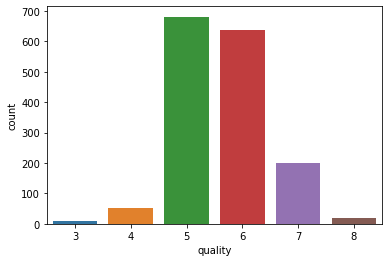

<matplotlib.axes._subplots.AxesSubplot at 0x7f8b8a7edfd0>

In [0]:
sns.countplot(data=df, x="quality")

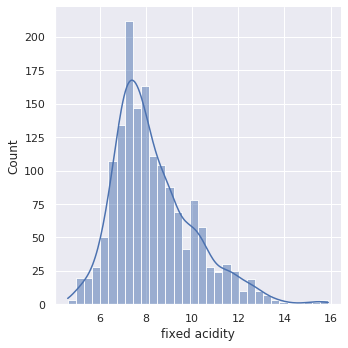

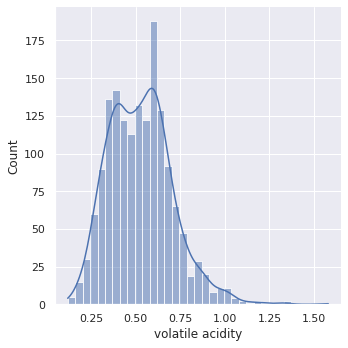

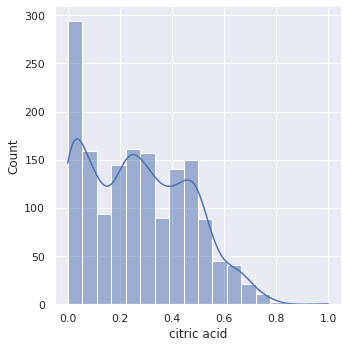

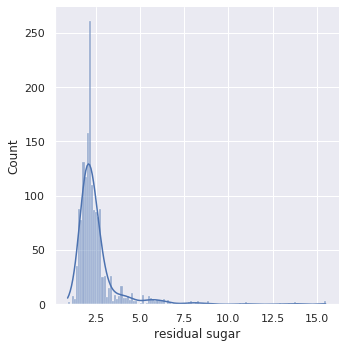

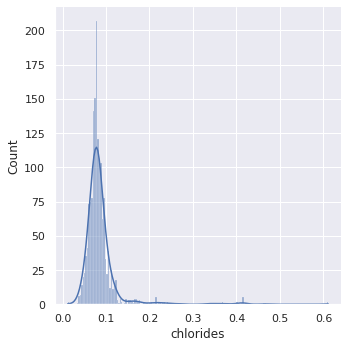

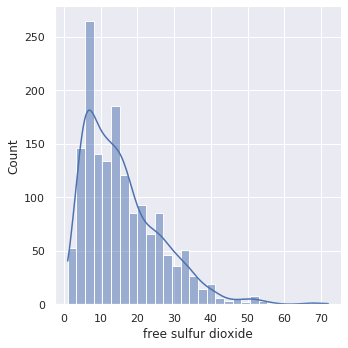

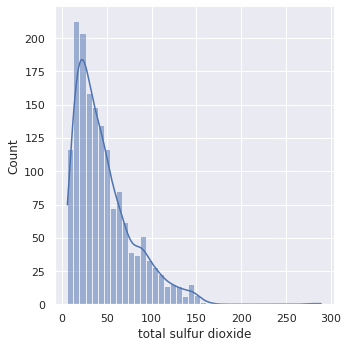

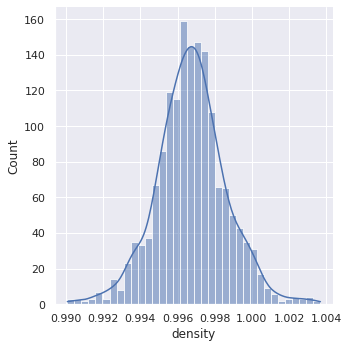

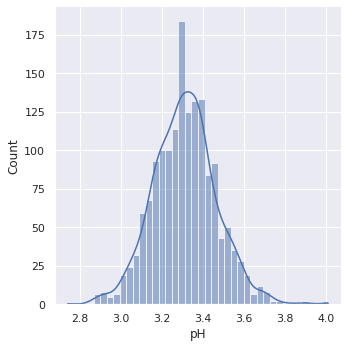

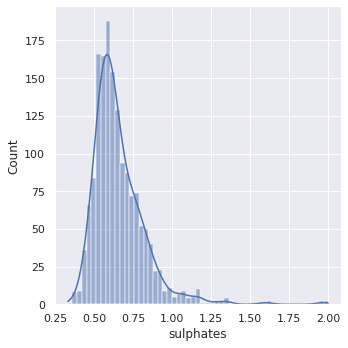

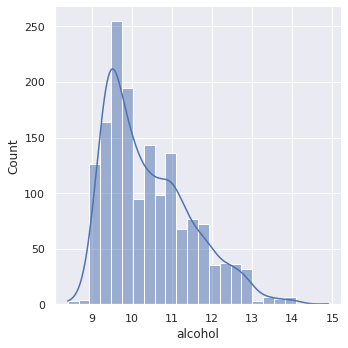

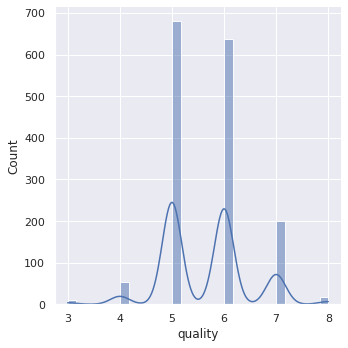

In [0]:
for attribute in df.columns:
  sns.displot(df, x=attribute, kde=True)

Out[16]:

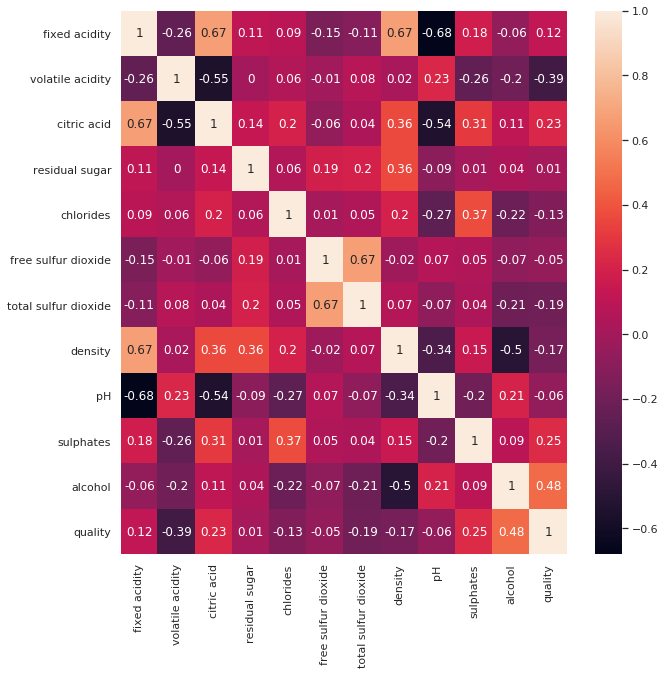

<matplotlib.axes._subplots.AxesSubplot at 0x7f8b86be8ed0>

In [0]:
sns.set(rc={'figure.figsize':(10,10)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

As we can see during the EDA, there were no null values and all the attributes were numeric (all of type float64, except quality which was int64). In the distribution plots, it is seen that they present different types of distribution, so we proceed to rescale the values.

Additionally, we are going to create the label that indicates whether the wine is of good quality or not, for this we will binarize the quality attribute, where a value greater than or equal to 7 is good and otherwise it will be of poor quality.

## Define appropriate evaluation metric for our case, preprocess and dataset split

In [0]:
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]

X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state=27)

## Train and evaluate Decision Trees and at least 2 different (Random Forest y AdaBoost) appropriate algorithm which you can choose from scikit-learn library. Also a report of classification models metrics

### Decision Tree

precision recall f1-score support

 0 0.92 0.93 0.93 410
 1 0.57 0.54 0.55 70

 accuracy 0.87 480
 macro avg 0.74 0.74 0.74 480
weighted avg 0.87 0.87 0.87 480

Out[72]:

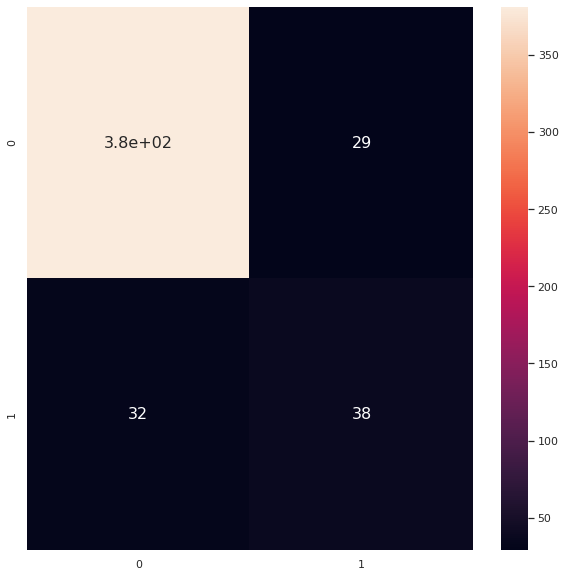

<matplotlib.axes._subplots.AxesSubplot at 0x7f8b77ba5e50>

In [0]:
model_tree = DecisionTreeClassifier(random_state=27)
model_tree.fit(X_train, y_train)
y_pred1 = model_tree.predict(X_test)

print(classification_report(y_test, y_pred1))

cm_tree = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm_tree, annot=True, annot_kws={"size": 16})

### Random Forest

precision recall f1-score support

 0 0.92 0.98 0.95 410
 1 0.80 0.51 0.63 70

 accuracy 0.91 480
 macro avg 0.86 0.75 0.79 480
weighted avg 0.90 0.91 0.90 480

Out[71]:

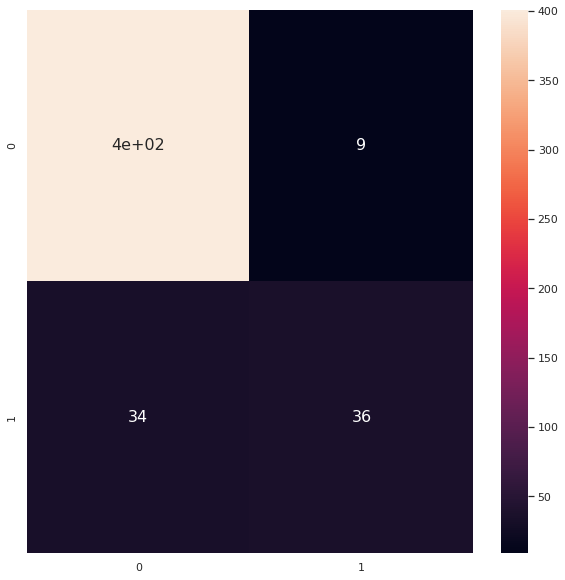

<matplotlib.axes._subplots.AxesSubplot at 0x7f8b7ce97750>

In [0]:
model_rf = RandomForestClassifier(random_state=27)
model_rf.fit(X_train, y_train)
y_pred2 = model_rf.predict(X_test)

print(classification_report(y_test, y_pred2))

cm_rf = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm_rf, annot=True, annot_kws={"size": 16})

### Adaboost

precision recall f1-score support

 0 0.90 0.95 0.92 410
 1 0.54 0.36 0.43 70

 accuracy 0.86 480
 macro avg 0.72 0.65 0.68 480
weighted avg 0.84 0.86 0.85 480

Out[74]:

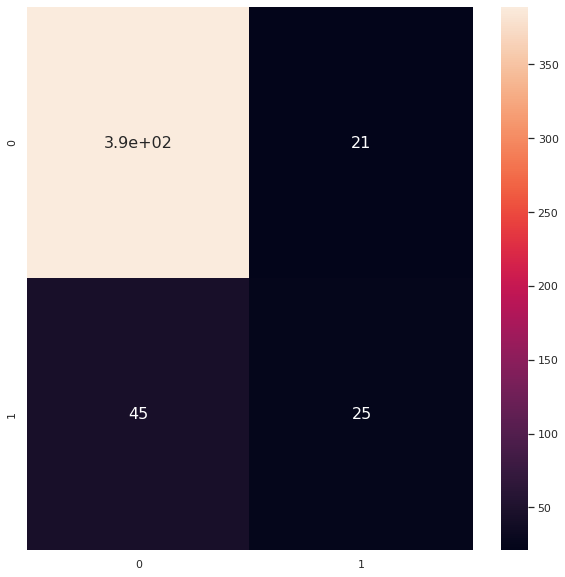

<matplotlib.axes._subplots.AxesSubplot at 0x7f8b7c44e1d0>

In [0]:
model_ada = AdaBoostClassifier(random_state=27)
model_ada.fit(X_train, y_train)
y_pred3 = model_ada.predict(X_test)

print(classification_report(y_test, y_pred3))

cm_ada = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm_ada, annot=True, annot_kws={"size": 16})

## Analyse and compare results of 3 algorithms.

d
### Model Comparison

Decision Tree: 0.849888 (0.022215)
Random Forest: 0.900789 (0.010121)
AdaBoost: 0.872193 (0.015745)

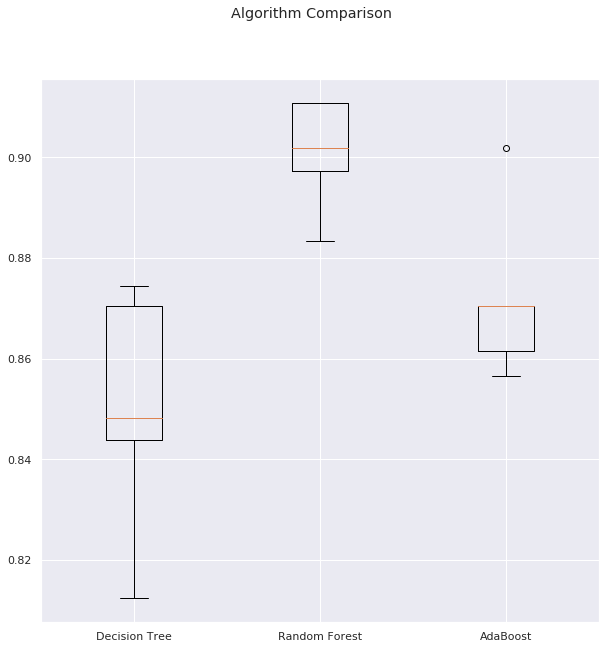

In [0]:
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = KFold(n_splits=10, random_state=2021)
	cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

If we look at the boxplot, we can see that the best model, in terms of accuracy, has the highest mean and the lowest standard deviation is the Random Forest

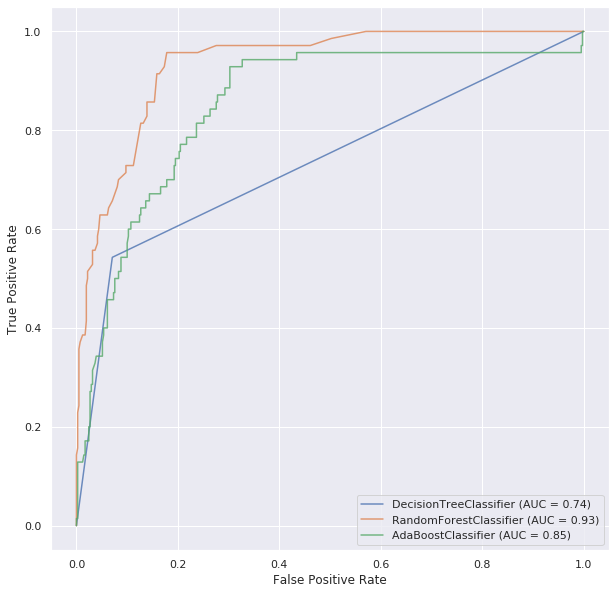

In [0]:
ax = plt.gca()
tree_roc = plot_roc_curve(model_tree, X_test, y_test, ax=ax, alpha=0.8)
rfc_roc = plot_roc_curve(model_rf, X_test, y_test, ax=ax, alpha=0.8)
ada_roc = plot_roc_curve(model_ada, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## Select best performing model based on evaluation metric you chose on test dataset.

We can also see the ROC graph where the models are compared and we validate that the Random Forest is the best model.